# Lecture 14: A modelling example

## A model for the trajectory of an object

### Newton's laws of motion

-   A large component of many computer games is the *physics engine*.
-   Typically this spends large numbers of cpu cycles simulating the motion of bodies, using Newton's laws, based upon the forces that are exerted upon them.
-   In particular, Newton's 2nd law of motion says that the acceleration of an object in each direction is equal to the applied force in that direction divided by the mass of the object:

    $$
    \text{Force} = \text{Mass} \times \text{Acceleration}.
    $$

-   One we know the acceleration of the object we can solve differential equations to calculate its subsequent velocity and position...

### Example - a projectile

-   Consider an object being projected from the top of a tall building.

-   We know its initial position and speed in each direction and wish to predict its trajectory.

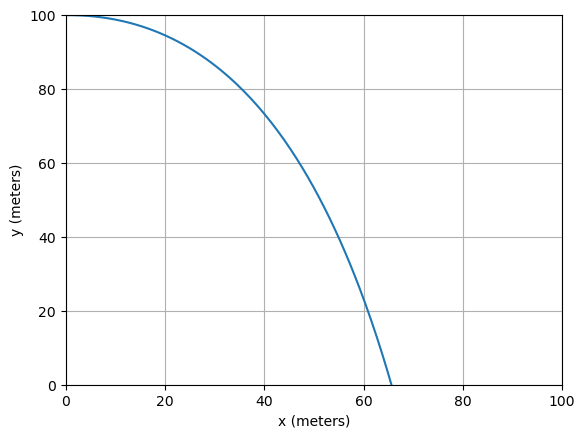

In [1]:
def projectile(n, t0, tfinal):
    t = np.zeros([n+1,1]) # Initialise the array t
    U = np.zeros([n+1,1]) # Initialise the array U
    V = np.zeros([n+1,1]) # Initialise the array V
    X = np.zeros([n+1,1]) # Initialise the array X
    Y = np.zeros([n+1,1]) # Initialise the array Y

    ## define initial conditions
    t[0] = 0.0
    U[0] = 20.0
    V[0] = 0.0
    X[0] = 0.0
    Y[0] = 100.0

    ## define constants
    k = 0.2
    g = 9.81

    ## Calculate size of each interval
    dt = (tfinal-t0)/float(n)

    ## Take n steps of Euler’s method
    for i in range(n):
        U[i+1] = U[i] + dt * (-k*U[i])
        V[i+1] = V[i] + dt * (-k*V[i] - g)
        X[i+1] = X[i] + dt * U[i]
        Y[i+1] = Y[i] + dt * V[i]
        t[i+1] = t[i] + dt

    return t, X, Y, U, V

import numpy as np
from matplotlib import pyplot as plt

t0 = 0.0
tfinal = 6.0

t, X, Y, U, V = projectile(160, t0, tfinal)
plt.plot(X, Y)

plt.xlabel("x (meters)")
plt.ylabel("y (meters)")
plt.grid()
plt.xlim(0.0, 100.0)
plt.ylim(0.0, 100.0)
plt.show()

### Projectile example - model

-   In order to produce a model we need to decide which are the most important forces acting on the object:

    -   gravity;
    -   air resistance.

-   Note that gravity only acts in the negative $y$ direction (not in the $x$ direction), and always leads to a constant acceleration ($g = 9.81 \, \mathrm{m}/\mathrm{s}^2$).

-   Air resistance *opposes* the motion in both the $x$ and $y$ directions, and we will assume that the force is proportional to the speed in each direction (as we did in the free fall example in [](./lec12.md)).

### Projectile example - equations

Using the following notation

-   $X(t)$ is the horizontal distance of the object at time $t$
-   $Y(t)$ is the vertical distance of the object at time $t$
-   $U(t)$ is the horizontal speed of the object at time $t$
-   $V(t)$ is the vertical speed of the object at time $t$

The above model leads to the following two differential equations:

$$
\begin{aligned}
U'(t) & = -k U(t) \\
V'(t) & = -k V(t) - g.
\end{aligned}
$$

We also know, from the definition of speed, that

$$
\begin{aligned}
X'(t) & = U(t) \\
Y'(t) & = V(t).
\end{aligned}
$$

### Projectile example - initial conditions

-   In addition to the above 4 differential equations for the unknown speeds ($U$ and $V$) and distances ($X$ and $Y$) we also need to know the initial configuration of the system.

-   For example, when $t = 0$:

    -   $U = 20$;
    -   $V = 0$;
    -   $X = 0$;
    -   $Y = 100$.

-   Note that we have dropped the units here for convenience, but those are implicit.

### Projectile example - implementation

In [2]:
def projectile(n, t0, tfinal):
    t = np.zeros([n+1,1]) # Initialise the array t
    U = np.zeros([n+1,1]) # Initialise the array U
    V = np.zeros([n+1,1]) # Initialise the array V
    X = np.zeros([n+1,1]) # Initialise the array X
    Y = np.zeros([n+1,1]) # Initialise the array Y

    ## define initial conditions
    t[0] = 0.0
    U[0] = 20.0
    V[0] = 0.0
    X[0] = 0.0
    Y[0] = 100.0

    ## define constants
    k = 0.2
    g = 9.81

    ## Calculate size of each interval
    dt = (tfinal-t0)/float(n)

    ## Take n steps of Euler’s method
    for i in range(n):
        U[i+1] = U[i] + dt * (-k*U[i])
        V[i+1] = V[i] + dt * (-k*V[i] - g)
        X[i+1] = X[i] + dt * U[i]
        Y[i+1] = Y[i] + dt * V[i]
        t[i+1] = t[i] + dt

    return t, X, Y, U, V

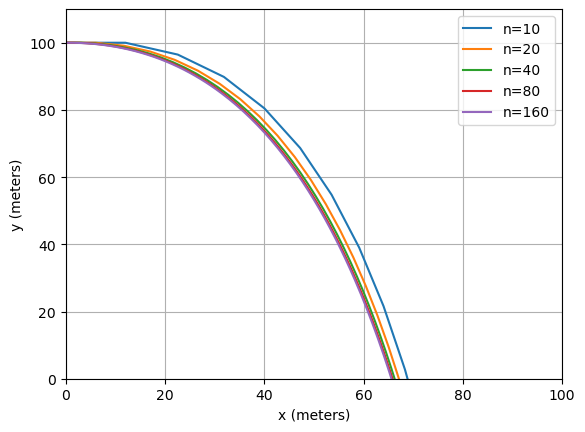

In [3]:
import numpy as np
from matplotlib import pyplot as plt

t0 = 0.0
tfinal = 6.0

for n in [10, 20, 40, 80, 160]:
    t, X, Y, U, V = projectile(n, t0, tfinal)
    plt.plot(X, Y, label=f"{n=}")

plt.xlabel("x (meters)")
plt.ylabel("y (meters)")
plt.xlim(0.0, 100.0)
plt.ylim(0.0, 110.0)
plt.legend()
plt.grid()
plt.show()

### Systems of equations

-   The above example shows how Euler's method can be applied to a system of four differential equations.

-   In general, a system of four differential equations will take the form:

    $$
      \begin{aligned}
      Y_1'(t) & = F_1(t, Y_1, Y_2, Y_3, Y_4) \\
      Y_2'(t) & = F_2(t, Y_1, Y_2, Y_3, Y_4) \\
      Y_3'(t) & = F_3(t, Y_1, Y_2, Y_3, Y_4) \\
      Y_4'(t) & = F_4(t, Y_1, Y_2, Y_3, Y_4).
      \end{aligned}
      $$

-   How does this relate to the projectile example above?

-   It is possible to apply Euler's method or the midpoint method to apply Euler's method or the midpoint method to a general system such as this:

-   These examples may look quite complex at first but they are simply applying the same techniques to systems of differential equations rather than a single differential equation.

## Solution using Euler's method

-   Consider the following system of differential equations:

    $$
    \vec{y}'(t) = A \vec{y}(t),
    \quad \text{ subject to } \quad \vec{y}(0) = \begin{pmatrix} 0 \\ 1 \end{pmatrix},
    $$

	where $\vec{y}(t) = \begin{pmatrix} y_1(t) \\ y_2(t) \end{pmatrix}$ and $A = \begin{pmatrix} -1 & 1 \\ 1 & -2 \end{pmatrix}$.

-   Approximate the solution using 2 steps of Euler's method with $\mathrm{d}t = 0.5$.

-   This gives

    $$
    \begin{aligned}
    \vec{y}^{(i+1)}
    & = \vec{y}^{(i)} + \mathrm{d}t \begin{pmatrix} -1 & 1 \\ 1 & -2 \end{pmatrix} \vec{y}^{(i)} \\
    t^{(i+1)} & = t^{(i)} + \mathrm{d}t.
    \end{aligned}
    $$

-   Writing this in component form and using python notation, this gives the following at each step:

    ``` python
    y1[i+1] = y1[i] + 0.5 * (-y1[i] + y2[i])
    y2[i+1] = y2[i] + 0.5 * (y1[i] - 2 * y2[i])
    t[i+1] = t[i] + 0.5
    ```

    or

    ``` python
    y[i + 1, :] = y[i, :] + 0.5 * A @ y[i, :]
    t[i+1] = t[i] + 0.5
    ```

## Discussion

-   Many useful models take the form of a single differential equation.

-   However, many important models require systems of *coupled differential equations* to be solved.

-   In the latter case we may generalise the standard techniques, such as Euler's method or the midpoint method, to get effective computational models.

-   Only 2 computational schemes have been introduced here (Euler and midpoint) - there are many more that we haven't considered...

## Further reading

- Wikipedia: [Projectile motion](https://en.wikipedia.org/wiki/Projectile_motion)
- [`scipy.integrate.solve_ivp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html)